In [1]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

from utils.matplotlib_functions import single_ax_plot
from utils.sklearn_functions import cross_validation

## TODO - split out the raw data from the random forest model

# Cleaning the raw data

In [2]:
raw = pd.read_csv('../data_gathering/wind/wf1.csv', index_col=0, parse_dates=True)

new_index = []
for stamp in raw.index:
    new = '2' + stamp[1:]
    new_index.append(new)

raw.index = pd.to_datetime(new_index)

In [3]:
from utils.pd_functions import check_duplicate_index, check_duplicate_rows, check_nans, check_index_length

In [4]:
check_duplicate_index(raw)

no duplicates found


In [5]:
check_duplicate_rows(raw)

no duplicate rows found


In [6]:
check_nans(raw)

0 nans


In [7]:
missing_dates = check_index_length(raw, freq='1H', verbose=False)

ideal index len 17518
actual index len 16920


In [21]:
#  deal with the missing date problem
expected_index = pd.DatetimeIndex(start=raw.index[0], end=raw.index[-1], freq='1H')
ideal_index_df = pd.DataFrame(index=expected_index)

clean = pd.concat([ideal_index_df, raw], axis=1)

assert clean.shape[0] == expected_index.shape[0]

In [22]:
#  we now have nans in the data as expected
_ = check_nans(clean, verbose=True)

598 nans
nan values are:
                     ForecastingTime  AirPressure  Temperature  Humidity  \
2000-01-21 02:00:00              NaN          NaN          NaN       NaN   
2000-01-21 03:00:00              NaN          NaN          NaN       NaN   
2000-01-21 04:00:00              NaN          NaN          NaN       NaN   
2000-01-21 05:00:00              NaN          NaN          NaN       NaN   
2000-01-21 06:00:00              NaN          NaN          NaN       NaN   

                     WindSpeed100m  WindSpeed10m  WindDirectionZonal  \
2000-01-21 02:00:00            NaN           NaN                 NaN   
2000-01-21 03:00:00            NaN           NaN                 NaN   
2000-01-21 04:00:00            NaN           NaN                 NaN   
2000-01-21 05:00:00            NaN           NaN                 NaN   
2000-01-21 06:00:00            NaN           NaN                 NaN   

                     WindDirectionMeridional  PowerGeneration  
2000-01-21 02:00:00  

In [23]:
print(clean.loc['2000-01-21 00:00:00':'2000-01-21 12:00:00', :])

clean.fillna(method='ffill', axis=0, inplace=True)
#clean.interpolate(method='linear', inplace=True)

clean.loc['2000-01-21 00:00:00':'2000-01-21 12:00:00', :]

                     ForecastingTime  AirPressure  Temperature  Humidity  \
2000-01-21 00:00:00             24.0     0.179217     0.184711  0.909329   
2000-01-21 01:00:00             25.0     0.181002     0.183413  0.919377   
2000-01-21 02:00:00              NaN          NaN          NaN       NaN   
2000-01-21 03:00:00              NaN          NaN          NaN       NaN   
2000-01-21 04:00:00              NaN          NaN          NaN       NaN   
2000-01-21 05:00:00              NaN          NaN          NaN       NaN   
2000-01-21 06:00:00              NaN          NaN          NaN       NaN   
2000-01-21 07:00:00              NaN          NaN          NaN       NaN   
2000-01-21 08:00:00              NaN          NaN          NaN       NaN   
2000-01-21 09:00:00              NaN          NaN          NaN       NaN   
2000-01-21 10:00:00              NaN          NaN          NaN       NaN   
2000-01-21 11:00:00              NaN          NaN          NaN       NaN   
2000-01-21 1

,ForecastingTime,AirPressure,Temperature,Humidity,WindSpeed100m,WindSpeed10m,WindDirectionZonal,WindDirectionMeridional,PowerGeneration
2000-01-21 00:00:00,24.0,0.179217,0.184711,0.909329,0.375133,0.302873,0.010199,0.600474,0.007273
2000-01-21 01:00:00,25.0,0.181002,0.183413,0.919377,0.344419,0.278637,0.009402,0.596508,0.001515
2000-01-21 02:00:00,25.0,0.181002,0.183413,0.919377,0.344419,0.278637,0.009402,0.596508,0.001515
2000-01-21 03:00:00,25.0,0.181002,0.183413,0.919377,0.344419,0.278637,0.009402,0.596508,0.001515
2000-01-21 04:00:00,25.0,0.181002,0.183413,0.919377,0.344419,0.278637,0.009402,0.596508,0.001515
2000-01-21 05:00:00,25.0,0.181002,0.183413,0.919377,0.344419,0.278637,0.009402,0.596508,0.001515
2000-01-21 06:00:00,25.0,0.181002,0.183413,0.919377,0.344419,0.278637,0.009402,0.596508,0.001515
2000-01-21 07:00:00,25.0,0.181002,0.183413,0.919377,0.344419,0.278637,0.009402,0.596508,0.001515
2000-01-21 08:00:00,25.0,0.181002,0.183413,0.919377,0.344419,0.278637,0.009402,0.596508,0.001515
2000-01-21 09:00:00,25.0,0.181002,0.183413,0.919377,0.344419,0.278637,0.009402,0.596508,0.001515


In [24]:
missing_dates = check_index_length(clean, freq='1H', verbose=False)

ideal index len 17518
actual index len 17518


In [12]:
#  keep a holdout set that we don't touch until the end
split = int(0.3 * clean.shape[0])
holdout = clean.iloc[-split:, :]

#  data to train & learn from
train_data = clean.iloc[split:, :]

assert holdout.shape[0] + train_data.shape[0] == clean.shape[0]

holdout.to_csv('../data_gathering/wind/wf1_holdout.csv')
train_data.to_csv('../data_gathering/wind/wf1_train_data.csv')
clean.to_csv('../data_gathering/wind/wf1_clean.csv')

print('raw {} clean {} holdout {} train_data {}'.format(raw.shape, clean.shape, holdout.shape, train_data.shape))

raw (16920, 9) clean (17518, 9) holdout (5255, 9) train_data (12263, 9)


# Feature engineering

In [13]:
from sklearn.pipeline import make_pipeline, make_union

from sklearn.preprocessing import StandardScaler

import utils.pipelines as p


def make_feature_pipeline(LAGS, HORIZIONS):

    lag_target = make_pipeline(
        p.ColumnSelector(['PowerGeneration']),
        p.OffsetGenerator('lag', LAGS),
        p.AlignPandas(LAGS, HORIZIONS),
        p.AsMatrix()
    )
    
    lag_features = make_pipeline(
        p.ColumnDropper(['PowerGeneration', 'ForecastingTime']),
        p.OffsetGenerator('lag', [LAGS[0]]),
        p.AlignPandas(LAGS, HORIZIONS),
        p.AsMatrix()
    )
    
    #  might be wrong!!!!! becuase data is hourly!!!
    cyclical_h = make_pipeline(
        p.HourlyCyclicalFeatures(),
        p.AlignPandas(LAGS, HORIZIONS),
        p.AsMatrix()
    )
    
    fc_time_cyclical = make_pipeline(
        p.ColumnSelector(['ForecastingTime']),
        p.CyclicalFeatures(train_data.loc[:, 'ForecastingTime'].max()),
        p.AlignPandas(LAGS, HORIZIONS),
        p.AsMatrix(),
    )
    
    return make_union(lag_target, lag_features, cyclical_h, fc_time_cyclical)

def make_feature_cols(LAGS, HORIZIONS):
    lag_target_cols = ['PowerGeneration lag_{}'.format(l) for l in LAGS]
    lag_feature_cols = p.ColumnDropper(['PowerGeneration', 'ForecastingTime']).transform(train_data).columns.tolist()
    lag_feature_cols = ['{} lag_{}'.format(col, 0) for col in lag_feature_cols]
    cyclical_h_cols = ['H_sin', 'H_cos']
    cyclical_fctime_cols = ['ForecastingTime sin', 'ForecastingTime cos']
    cols = lag_target_cols
    cols.extend(lag_feature_cols)
    cols.extend(cyclical_h_cols)
    cols.extend(cyclical_fctime_cols)
    
    return cols
    
def make_target_pipeline(LAGS, HORIZIONS):
    return make_pipeline(p.ColumnSelector('PowerGeneration'),
                         p.OffsetGenerator('horizion', HORIZIONS),
                         p.AlignPandas(LAGS, HORIZIONS),
                         p.AsMatrix())

In [14]:
LAGS = [0, 1, 2, 3, 4]
HORIZIONS = [1]

feature_pipe = make_feature_pipeline(LAGS, HORIZIONS)
feature_cols = make_feature_cols(LAGS, HORIZIONS)

target_pipe = make_target_pipeline(LAGS, HORIZIONS)

In [15]:
#  check pipelines are working correctly

features = feature_pipe.fit_transform(train_data)
assert features.shape[1] == len(feature_cols)
target = target_pipe.fit_transform(train_data)

print('features shape {} target shape {}'.format(features.shape, target.shape))

features shape (12258, 16) target shape (12258, 1)


In [16]:
def plot_feature_importances(rf, cols):
    importances = pd.DataFrame()
    importances.loc[:, 'importances'] = rf.feature_importances_
    importances.loc[:, 'features'] = cols
    importances.sort_values('importances', inplace=True)
    return single_ax_plot(importances, 'features', 'importances', kind='barh', color='b')

In [17]:
out = cross_validation(
    RandomForestRegressor, 
    {'n_estimators': 2000, 'max_features': 0.5, 'n_jobs': -1},
    make_feature_pipeline,
    make_target_pipeline,
    {'LAGS':LAGS, 'HORIZIONS': HORIZIONS},
    train_data,
    n_folds=3,
    verbose=True)

running 3 folds cross_validation over {'max_features': 0.5, 'n_estimators': 2000, 'n_jobs': -1}
fold 1 98.8 % train score 90.0 % test score
fold 2 98.8 % train score 84.7 % test score
fold 3 98.7 % train score 93.5 % test score
CV done - train 89.40321860043423 % test 98.74069875277155 %


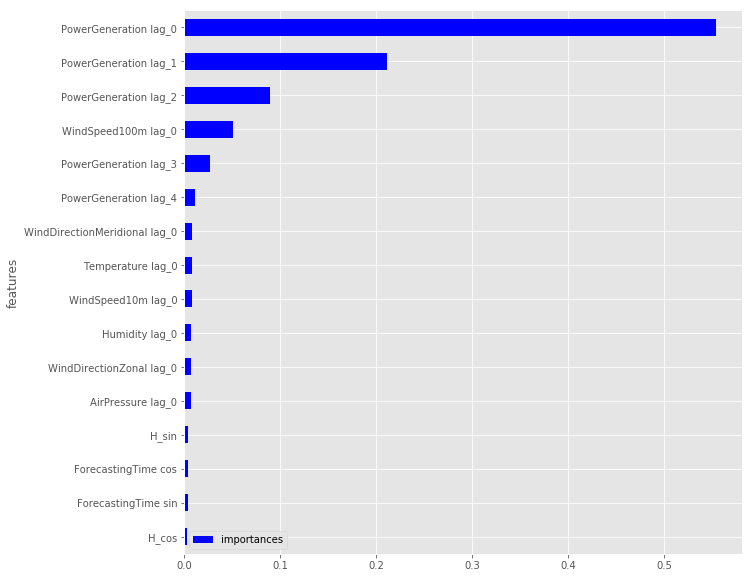

In [18]:
model = out['models'][-1]
_ = plot_feature_importances(model, feature_cols)

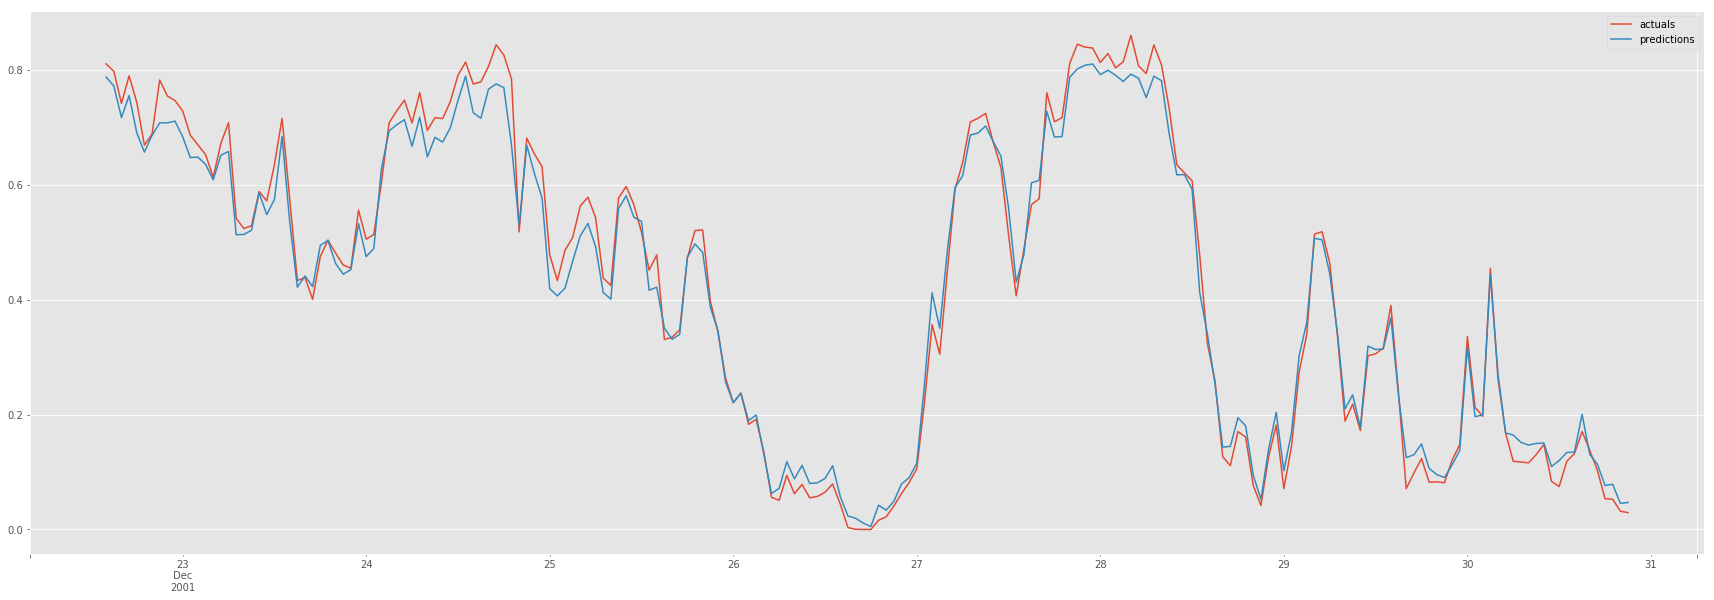

In [19]:
def plot_predictions(model, features, original_data):
    
    preds = pd.DataFrame()
    
    preds.loc[:, 'predictions'] = model.predict(features)
    
    subset = original_data.iloc[max(LAGS):-max(HORIZIONS), :]
    
    actuals = subset.loc[:, 'PowerGeneration']
    
    preds.index = actuals.index
    preds.loc[:, 'actuals'] = actuals
    
    f, a = plt.subplots(figsize=(30, 10))

    preds = preds.iloc[-200:, :]

    preds.plot(ax=a, y='actuals')
    preds.plot(ax=a, y='predictions')
    
    return f
    
_ = plot_predictions(model, features, train_data)

In [20]:
feature_pipe = out['feature_pipe'][-1]
target_pipe = out['target_pipe'][-1]

holdout_features = feature_pipe.transform(holdout)
holdout_target = target_pipe.transform(holdout)
holdout_score = model.score(holdout_features, holdout_target)

print('hold out test score is {:2.2f} %'.format(100*holdout_score))

hold out test score is 94.55 %
